In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('shopping_behavior_updated.csv')
data.head(4)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [5]:
# Checking Missing value
data.isna().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

# EDA

Feature Engineering - Label Encoding

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Item Purchased'] = le.fit_transform(data['Item Purchased'])
data['Location'] = le.fit_transform(data['Location'])
data['Size'] = le.fit_transform(data['Size'])
data['Color'] = le.fit_transform(data['Color'])
data['Season'] = le.fit_transform(data['Season'])
data['Subscription Status'] = le.fit_transform(data['Subscription Status'])
data['Shipping Type'] = le.fit_transform(data['Shipping Type'])
data['Discount Applied'] = le.fit_transform(data['Discount Applied'])
data['Promo Code Used'] = le.fit_transform(data['Promo Code Used'])
data['Payment Method'] = le.fit_transform(data['Payment Method'])
data['Frequency of Purchases'] = le.fit_transform(data['Frequency of Purchases'])
data['Category'] = le.fit_transform(data['Category'])

In [13]:
data.describe()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,0.680000,12.035385,1.001795,59.764359,24.266410,1.120000,12.109487,1.492821,3.749949,0.270000,2.514359,0.430000,0.430000,25.351538,2.512308,2.974872
std,1125.977353,15.207589,0.466536,7.199162,0.896688,23.685392,14.343299,0.930496,7.221592,1.117236,0.716223,0.444016,1.697591,0.495139,0.495139,14.447125,1.690643,1.998559
min,1.000000,18.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,2.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,975.750000,31.000000,0.000000,6.000000,0.000000,39.000000,12.000000,0.000000,6.000000,0.750000,3.100000,0.000000,1.000000,0.000000,0.000000,13.000000,1.000000,1.000000
50%,1950.500000,44.000000,1.000000,12.000000,1.000000,60.000000,24.000000,1.000000,12.000000,1.000000,3.700000,0.000000,3.000000,0.000000,0.000000,25.000000,2.000000,3.000000
75%,2925.250000,57.000000,1.000000,18.000000,1.000000,81.000000,36.000000,2.000000,18.000000,2.000000,4.400000,1.000000,4.000000,1.000000,1.000000,38.000000,4.000000,5.000000
max,3900.000000,70.000000,1.000000,24.000000,3.000000,100.000000,49.000000,3.000000,24.000000,3.000000,5.000000,1.000000,5.000000,1.000000,1.000000,50.000000,5.000000,6.000000


In [14]:
data.dtypes

Customer ID                 int64
Age                         int64
Gender                      int64
Item Purchased              int64
Category                    int32
Purchase Amount (USD)       int64
Location                    int64
Size                        int64
Color                       int64
Season                      int64
Review Rating             float64
Subscription Status         int64
Shipping Type               int64
Discount Applied            int64
Promo Code Used             int64
Previous Purchases          int64
Payment Method              int64
Frequency of Purchases      int64
dtype: object

In [15]:
data['Frequency of Purchases'].unique()

array([3, 6, 0, 5, 1, 4, 2], dtype=int64)

<Axes: xlabel='Frequency of Purchases', ylabel='count'>

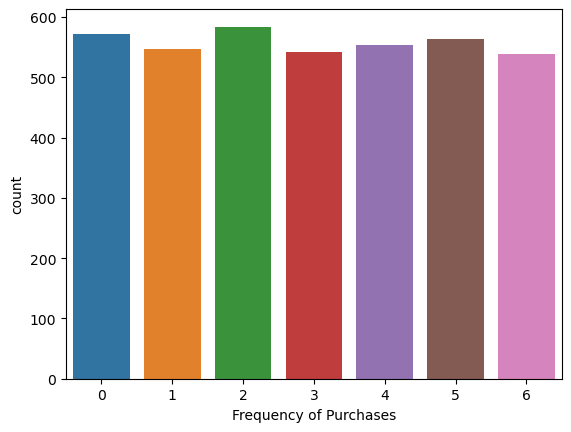

In [16]:
sns.countplot(data,x='Frequency of Purchases')

In [17]:
data.shape

(3900, 18)

<Axes: >

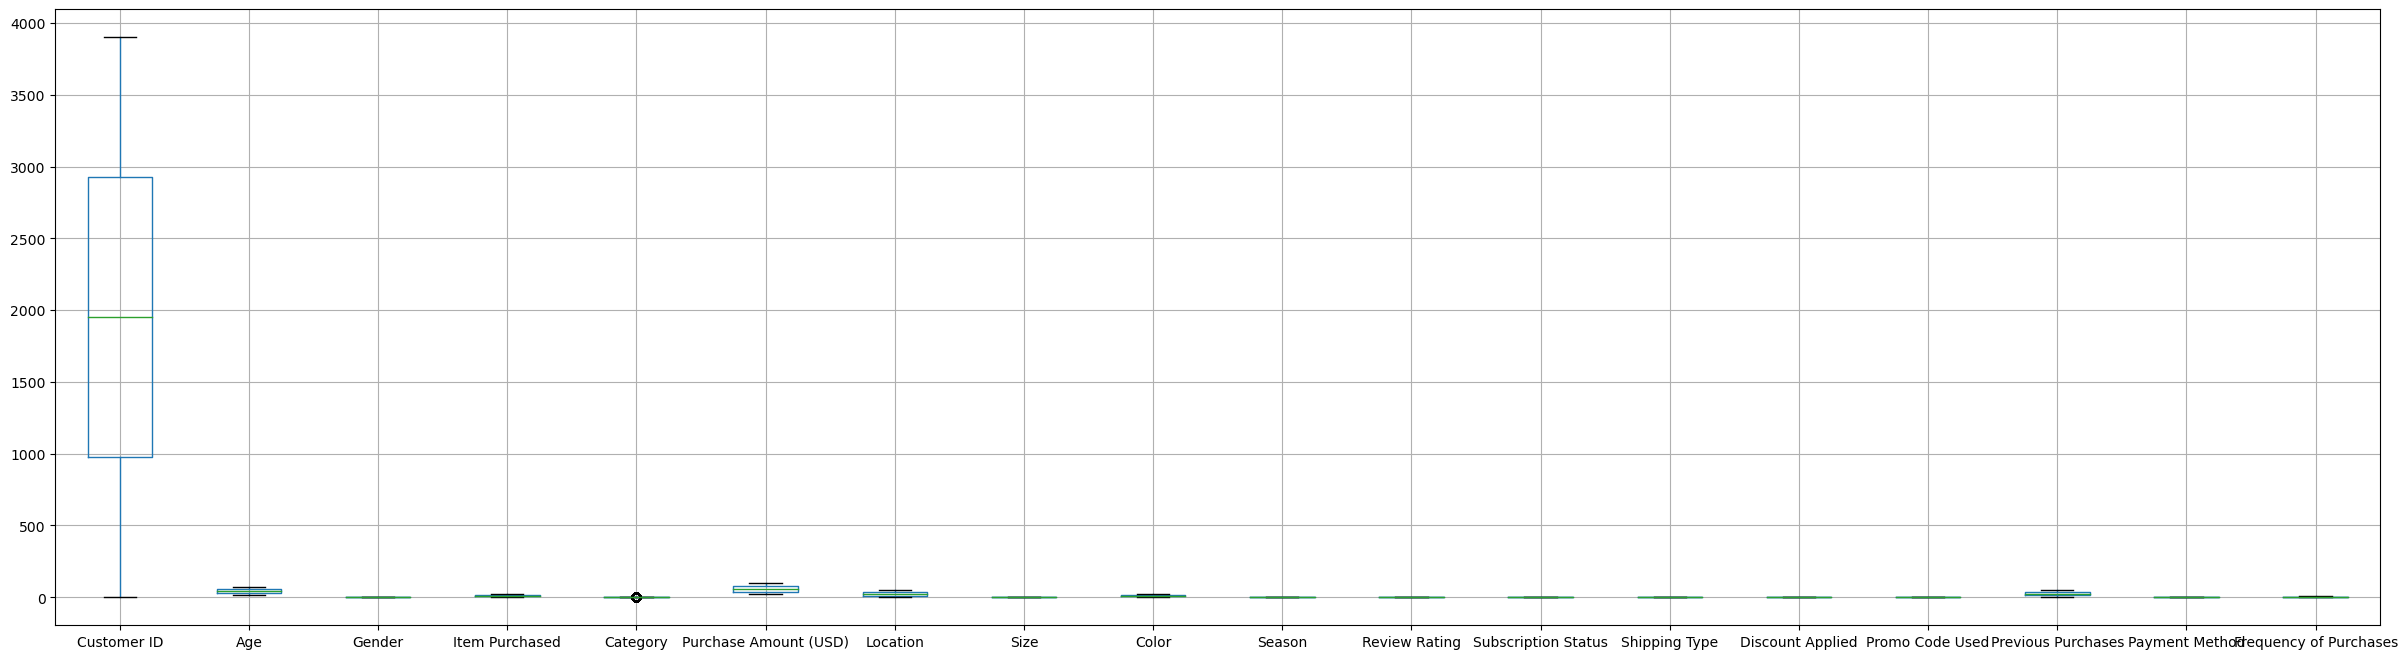

In [23]:
data.boxplot(figsize = (30,8))

In [24]:
data.corr()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
Customer ID,1.000000,-0.004079,-0.807960,0.003648,-0.004133,0.011048,-0.013257,-0.001801,-0.011144,-0.018027,0.001343,-0.768960,-0.020979,-0.857496,-0.857496,-0.039159,-0.015504,-0.012250
Age,-0.004079,1.000000,0.002763,-0.000636,0.003546,-0.010424,-0.001957,-0.023654,0.006700,-0.028418,-0.021949,0.006492,-0.010743,0.004366,0.004366,0.040445,-0.005215,0.017406
Gender,-0.807960,0.002763,1.000000,0.001921,-0.004144,-0.014044,0.000747,0.018764,-0.000560,0.016258,0.008164,0.417197,0.016490,0.595823,0.595823,0.035873,0.003369,0.012829
Item Purchased,0.003648,-0.000636,0.001921,1.000000,0.052951,-0.005342,0.020390,-0.008942,0.027241,0.012755,-0.004621,0.003028,0.016244,-0.013983,-0.013983,-0.001513,-0.006695,0.015249
Category,-0.004133,0.003546,-0.004144,0.052951,1.000000,-0.017841,0.000541,-0.035916,0.009119,0.000141,-0.000299,0.011022,-0.009031,0.000572,0.000572,-0.015669,-0.000776,0.012190
Purchase Amount (USD),0.011048,-0.010424,-0.014044,-0.005342,-0.017841,1.000000,0.028803,0.027805,-0.004326,-0.018358,0.030776,-0.006996,-0.024637,-0.017798,-0.017798,0.008063,-0.009077,-0.017219
Location,-0.013257,-0.001957,0.000747,0.020390,0.000541,0.028803,1.000000,0.000275,-0.004944,0.012259,-0.004222,0.004529,-0.001458,0.011926,0.011926,-0.032962,-0.006931,-0.012740
Size,-0.001801,-0.023654,0.018764,-0.008942,-0.035916,0.027805,0.000275,1.000000,-0.005124,-0.009286,0.027603,-0.014501,0.001020,-0.001804,-0.001804,-0.011152,-0.033220,-0.008860
Color,-0.011144,0.006700,-0.000560,0.027241,0.009119,-0.004326,-0.004944,-0.005124,1.000000,-0.000109,0.027356,0.021333,-0.000034,0.019394,0.019394,0.000418,-0.007578,-0.009938
Season,-0.018027,-0.028418,0.016258,0.012755,0.000141,-0.018358,0.012259,-0.009286,-0.000109,1.000000,0.000160,-0.005139,0.019122,0.015550,0.015550,0.024333,-0.005520,0.009568


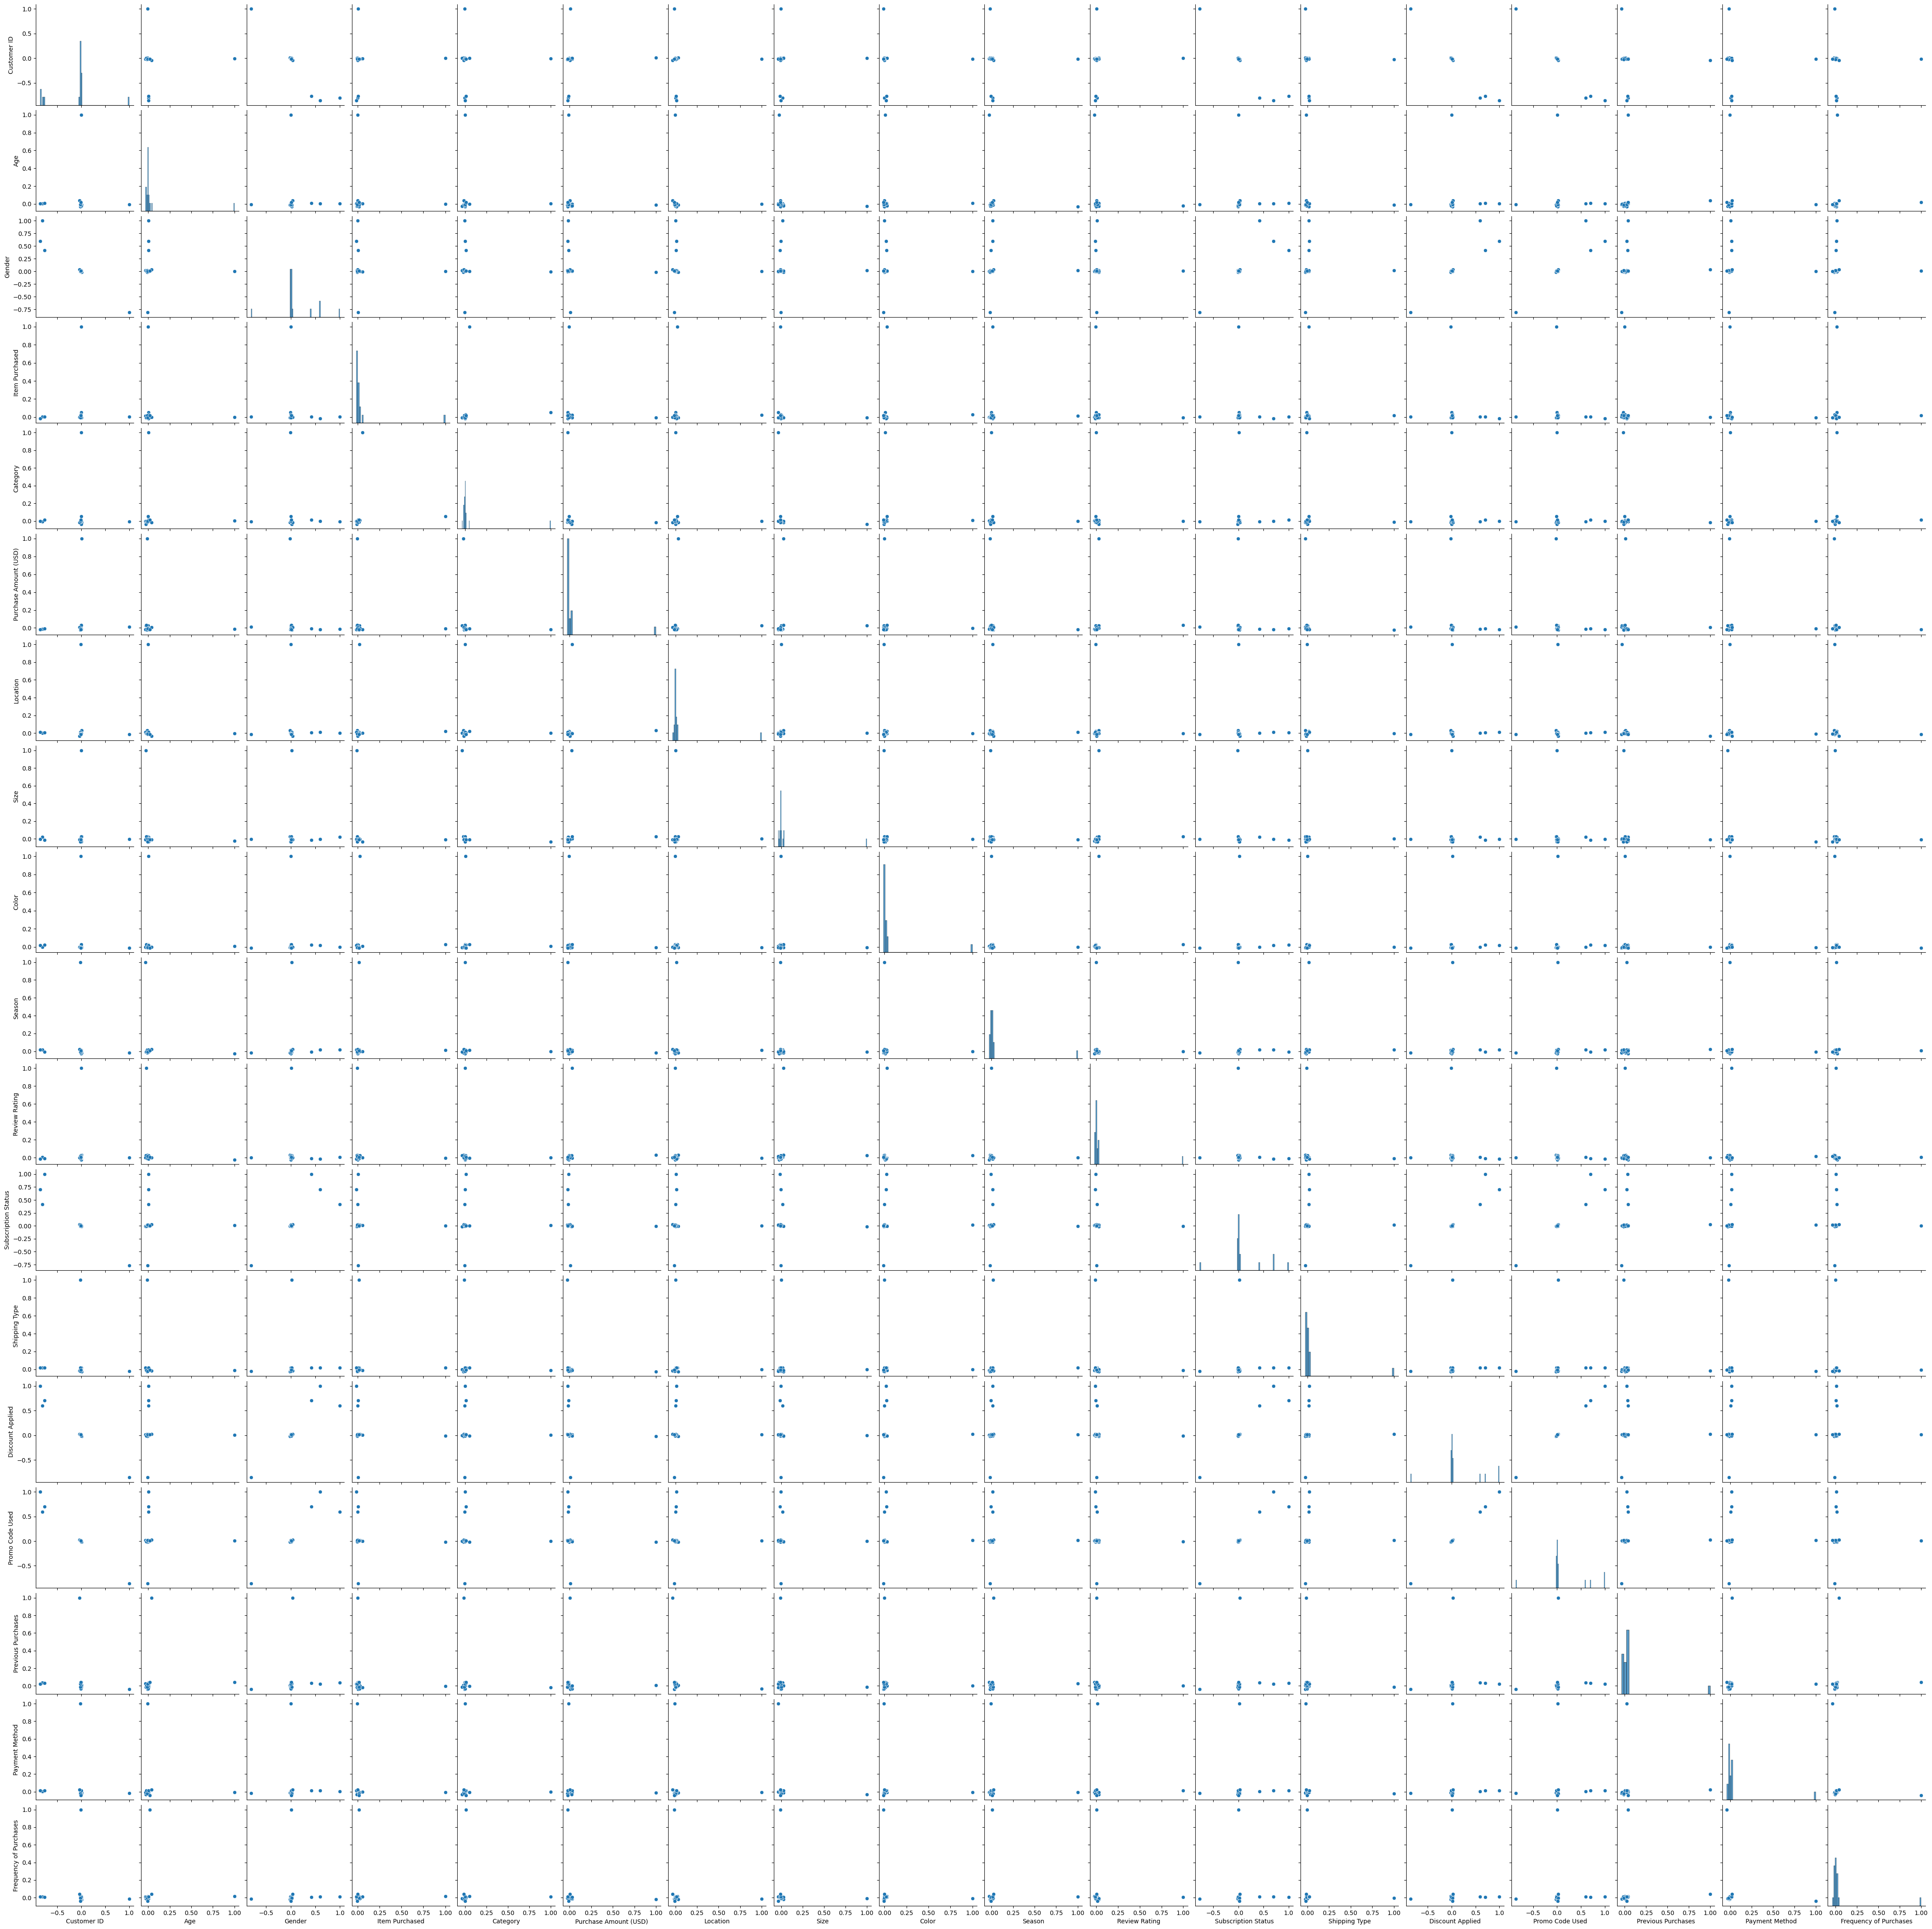

In [26]:
sns.pairplot(data.corr())

# Assign X & Y

In [27]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1:].values

In [28]:
x.shape,y.shape

((3900, 17), (3900, 1))

In [29]:
x.head(2)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method
0,1,55,1,2,1,53,16,0,7,3,3.1,1,1,1,1,14,5
1,2,19,1,23,1,64,18,0,12,3,3.1,1,1,1,1,2,1


In [31]:
y[2]

array([6], dtype=int64)

# Spliting Data between Training and Testing 

In [32]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .2,random_state = 5)

# Building Decision tree Model with criterian = GINI index method & Its Performance Measure

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()

print('Decision Tree Model')
print('*'*75)
print('\n Training Phase')
dt_clf.fit(xtrain,ytrain)
print()
print('HyperParameters:\n',dt_clf.get_params())
print()
print('Training completed\n')
print('*'*75)
print()
print('Testing Phase:')
ypred = dt_clf.predict(xtest)
print()
print('Predicted value is:\n',ypred)
print()
print('Testing completed')
print('*'*75)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('*'*75)
print('Decision Tree Pefromance Measure')
print('*'*75)

print('Accuracy score:\t',accuracy_score(ytest,ypred))
print('*'*75)
print('Confusion Matrix:\t\n',confusion_matrix(ytest,ypred))
print('*'*75)
print('Classification Report:\t',classification_report(ytest,ypred))
print('*'*75)

Decision Tree Model
***************************************************************************

 Training Phase

HyperParameters:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

Training completed

***************************************************************************

Testing Phase:

Predicted value is:
 [1 3 3 4 2 6 2 6 3 0 5 6 3 2 1 3 2 2 3 4 2 6 6 4 1 0 1 5 2 4 0 1 1 0 5 1 1
 4 1 3 6 5 0 5 5 3 4 2 4 3 2 3 2 6 0 4 5 0 6 6 2 2 2 5 2 1 0 4 5 1 3 2 3 0
 0 5 1 2 1 4 1 6 0 0 5 4 5 1 3 3 0 0 6 5 5 5 3 4 0 4 0 6 4 5 4 1 1 2 4 5 2
 2 3 2 5 2 1 0 4 1 2 6 0 3 3 0 0 3 3 4 4 6 1 1 6 3 3 0 1 6 3 2 3 0 3 3 1 0
 0 4 0 3 3 2 2 1 2 6 6 4 1 5 5 0 5 5 6 1 6 5 2 3 5 1 1 4 4 3 0 3 3 3 5 1 0
 4 6 0 6 5 0 3 1 1 2 4 0 2 4 6 2 2 3 0 3 0 5 6 3 2 2 1 3 6 2 1 6 2 5 4 1 1
 3 5

# Building Decision tree Model with criterian = Entropy index method & Its Performance Measure

In [39]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)

print('Decision Tree Model')
print('*'*75)
print('\n Training Phase')
dt_clf.fit(xtrain,ytrain)
print()
print('HyperParameters:\n',dt_clf.get_params())
print()
print('Training completed\n')
print('*'*75)
print()
print('Testing Phase:')
ypred = dt_clf.predict(xtest)
print()
print('Predicted value is:\n',ypred)
print()
print('Testing completed')
print('*'*75)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print('*'*75)
print('Decision Tree Pefromance Measure')
print('*'*75)

print('Accuracy score:\t',accuracy_score(ytest,ypred))
print('*'*75)
print('Confusion Matrix:\t\n',confusion_matrix(ytest,ypred))
print('*'*75)
print('Classification Report:\t',classification_report(ytest,ypred))
print('*'*75)

Decision Tree Model
***************************************************************************

 Training Phase

HyperParameters:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}

Training completed

***************************************************************************

Testing Phase:

Predicted value is:
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 5 4 2 2 2
 4 2 2 2 2 5 2 1 2 2 2 5 2 2 5 2 2 2 2 2 2 2 5 2 5 2 2 2 2 2 2 5 2 2 5 2 2
 2 2 2 2 1 2 2 5 2 2 2 2 2 2 2 2 2 2 2 5 2 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 5 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 5 5 2 2 2 2 2 2 3
 2 2 5 2 2 5 2 2 2 2 2 2 2 5 2 2 2 2 2 5 5 2 2 5 2 2 2 5 2 2 1 2 2 5 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 5 2 2 5 2 2 2 2 2 2 2 5 2 2 2 2 2 2 2 2 2 2
 2 2

[Text(0.5, 0.875, 'x[0] <= 27.5\nentropy = 2.807\nsamples = 3120\nvalue = [451, 446, 461, 456, 429, 449, 428]'),
 Text(0.25, 0.625, 'x[9] <= 2.5\nentropy = 2.237\nsamples = 22\nvalue = [5, 3, 0, 2, 1, 2, 9]'),
 Text(0.125, 0.375, 'x[8] <= 13.5\nentropy = 1.531\nsamples = 14\nvalue = [5, 3, 0, 0, 0, 0, 6]'),
 Text(0.0625, 0.125, 'entropy = 0.918\nsamples = 6\nvalue = [0, 2, 0, 0, 0, 0, 4]'),
 Text(0.1875, 0.125, 'entropy = 1.299\nsamples = 8\nvalue = [5, 1, 0, 0, 0, 0, 2]'),
 Text(0.375, 0.375, 'x[15] <= 14.5\nentropy = 1.906\nsamples = 8\nvalue = [0, 0, 0, 2, 1, 2, 3]'),
 Text(0.3125, 0.125, 'entropy = 0.918\nsamples = 3\nvalue = [0, 0, 0, 2, 1, 0, 0]'),
 Text(0.4375, 0.125, 'entropy = 0.971\nsamples = 5\nvalue = [0, 0, 0, 0, 0, 2, 3]'),
 Text(0.75, 0.625, 'x[3] <= 3.5\nentropy = 2.807\nsamples = 3098\nvalue = [446, 443, 461, 454, 428, 447, 419]'),
 Text(0.625, 0.375, 'x[8] <= 21.5\nentropy = 2.785\nsamples = 498\nvalue = [78, 75, 74, 72, 44, 85, 70]'),
 Text(0.5625, 0.125, 'entropy = 

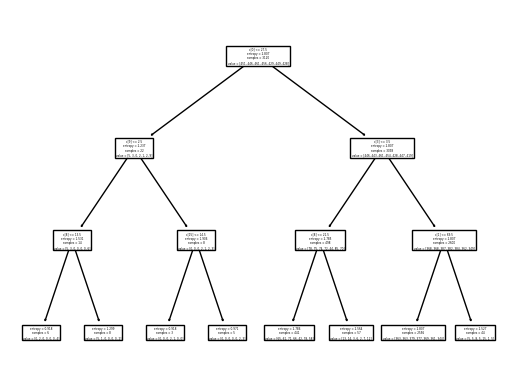

In [40]:
from sklearn import tree
tree.plot_tree(dt_clf)

# Building decision tree model with max_depth

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV


param_grid = { 'max_depth':[None,3,4,5,6,7,8,10]}

clf = DecisionTreeClassifier(criterion = 'entropy')
grid_search = GridSearchCV(clf,param_grid,cv=5)
grid_search.fit(xtrain,ytrain)
best_max_depth = grid_search.best_params_['max_depth']
print(best_max_depth)

6


In [42]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [43]:
grid_search.best_index_

4

In [44]:
grid_search.best_params_

{'max_depth': 6}

In [45]:
grid_search.best_score_

0.1519230769230769

In [46]:
grid_search.feature_names_in_

array(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method'], dtype=object)